In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [52]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Education: ['Bachelors' 'Masters' 'PHD']
City: ['Bangalore' 'Pune' 'New Delhi']
Gender: ['Male' 'Female']
EverBenched: ['No' 'Yes']


No missing values

<Axes: title={'center': 'Percentage of employees that have left'}, ylabel='count'>

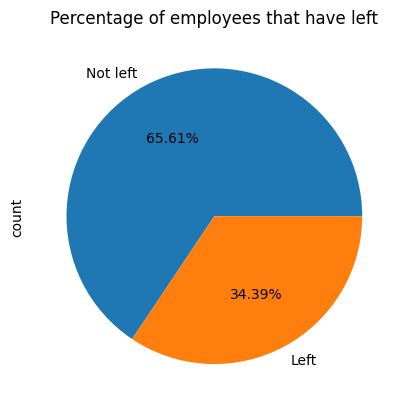

In [8]:
df['LeaveOrNot'].value_counts().plot(kind='pie', title='Percentage of employees that have left', labels = ['Not left', 'Left'], autopct='%1.2f%%')

<Axes: title={'center': 'Count per education level'}, xlabel='Education'>

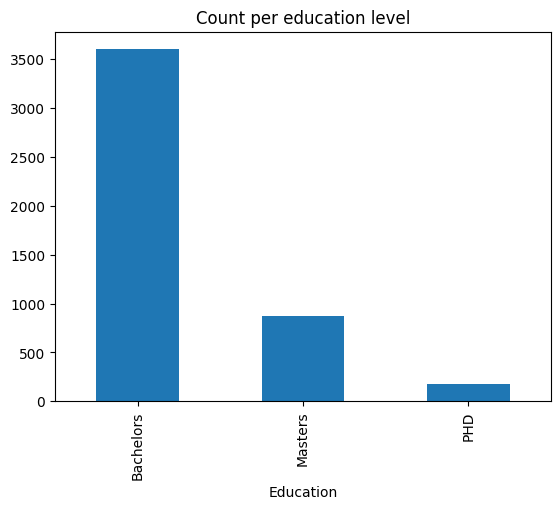

In [18]:
df['Education'].value_counts().plot(kind='bar', title='Count per education level')

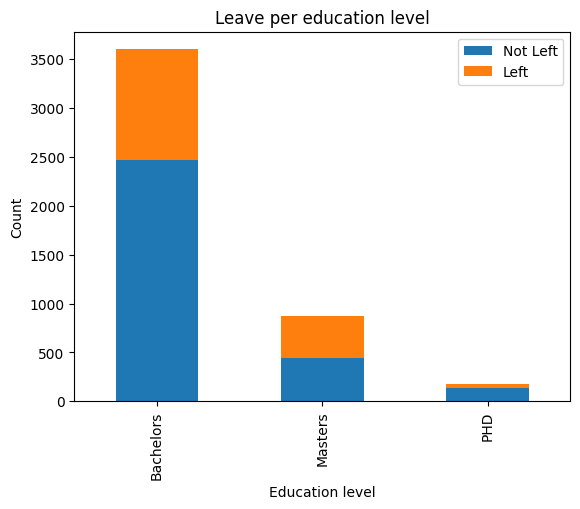

In [19]:
leave_per_education = df.groupby('Education')['LeaveOrNot'].value_counts().unstack()
leave_per_education.plot(kind='bar', stacked=True, title='Leave per education level')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.legend(['Not Left', 'Left'], loc='upper right')
plt.show()


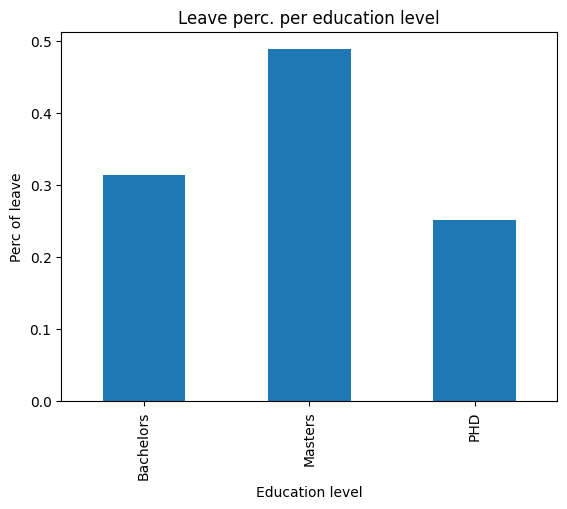

In [20]:
leave_perc_per_education = df.groupby('Education')['LeaveOrNot'].mean()
leave_perc_per_education.plot(kind='bar', title='Leave perc. per education level')
plt.xlabel('Education level')
plt.ylabel('Perc of leave')
plt.show()

<Axes: title={'center': 'Percentage of leaves per joining year'}, xlabel='JoiningYear'>

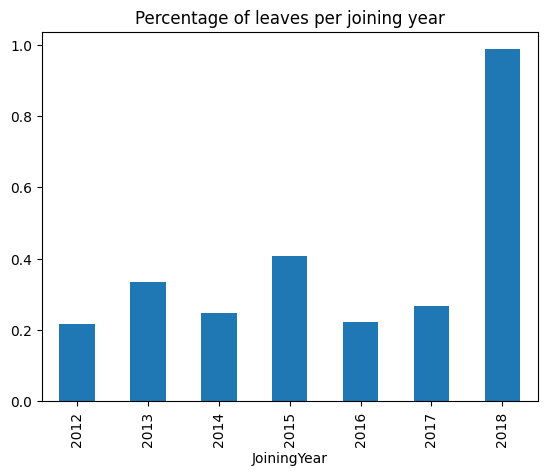

In [36]:
leave_perc_per_join_year = df.groupby('JoiningYear')['LeaveOrNot'].mean()
leave_perc_per_join_year.plot(kind='bar', title='Percentage of leaves per joining year')

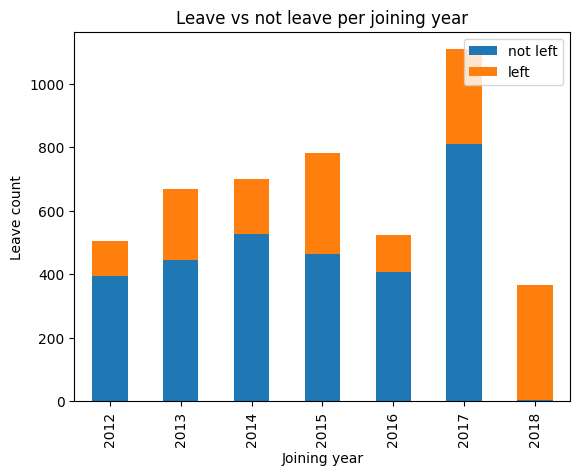

In [40]:
count_per_joining_year = df.groupby('JoiningYear')['LeaveOrNot'].value_counts().unstack()
count_per_joining_year.plot(kind='bar', stacked=True)
plt.legend( labels=['not left', 'left'], loc='upper right')
plt.xlabel('Joining year')
plt.ylabel('Leave count')
plt.title('Leave vs not leave per joining year')
plt.show()

<Axes: title={'center': 'Leave perc per experience'}, xlabel='ExperienceInCurrentDomain'>

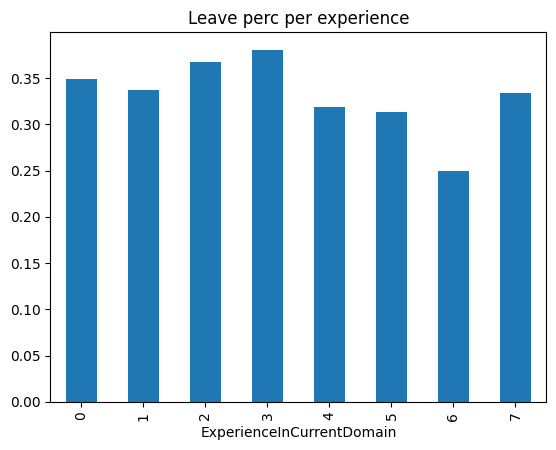

In [38]:
leave_perc_per_experience = df.groupby('ExperienceInCurrentDomain')['LeaveOrNot'].mean()
leave_perc_per_experience.plot(kind='bar', title='Leave perc per experience')

<Axes: title={'center': 'Leave perc per payment tier'}, xlabel='PaymentTier'>

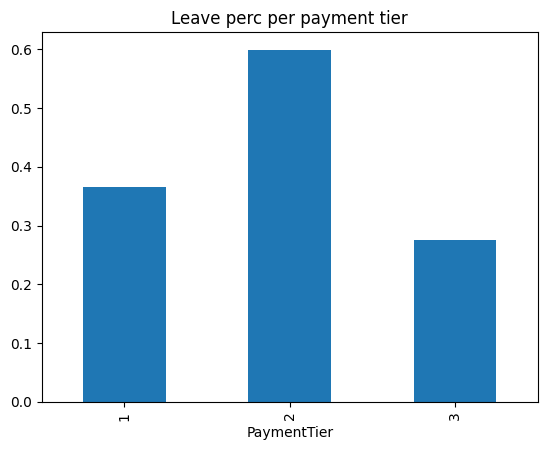

In [42]:
leave_perc_per_payment_tier = df.groupby('PaymentTier')['LeaveOrNot'].mean()
leave_perc_per_payment_tier.plot(kind='bar', title='Leave perc per payment tier')


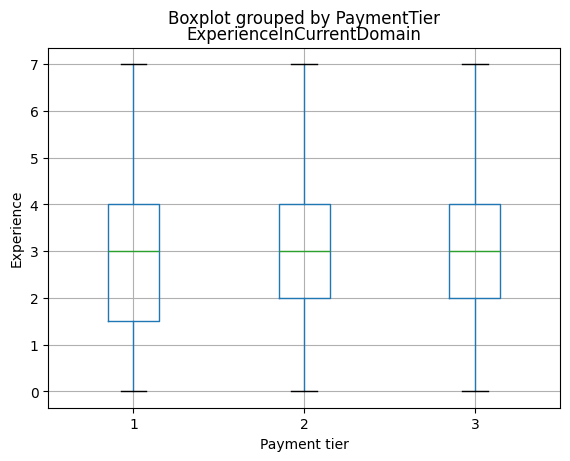

In [43]:
df.boxplot(column='ExperienceInCurrentDomain', by='PaymentTier')
plt.xlabel('Payment tier')
plt.ylabel('Experience')
plt.show()

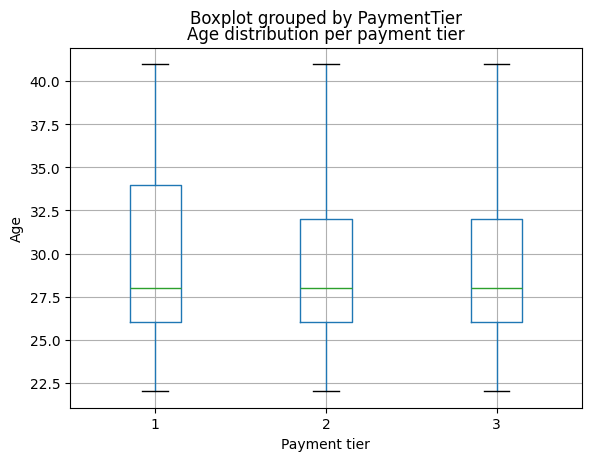

In [46]:
df.boxplot(column='Age', by='PaymentTier')
plt.xlabel('Payment tier')
plt.ylabel('Age')
plt.title('Age distribution per payment tier')
plt.show()

<Axes: >

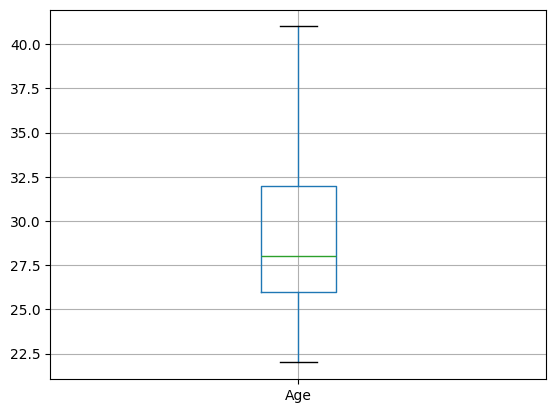

In [48]:
df.boxplot(column='Age')

<Axes: xlabel='City'>

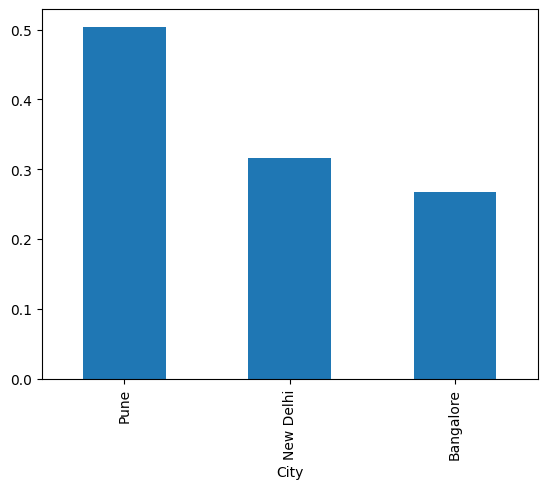

In [55]:
df.groupby('City')['LeaveOrNot'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='EverBenched'>

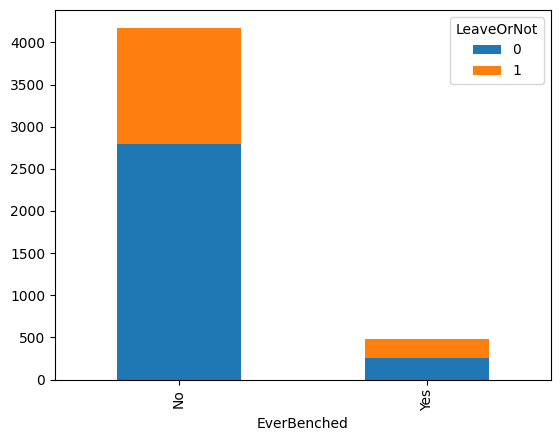

In [57]:
pivoted_leave_counts_by_benched = df.groupby('EverBenched')['LeaveOrNot'].value_counts().unstack()
pivoted_leave_counts_by_benched.plot(kind='bar', stacked=True)